In [1]:
import pandas as pd

# Data

In [2]:
dtrain = pd.read_csv("application_train.csv")
print("info data : ",dtrain.info())
print("tipe data : ",dtrain.dtypes.unique())
print("dimensi data : ",dtrain.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
info data :  None
tipe data :  [dtype('int64') dtype('O') dtype('float64')]
dimensi data :  (307511, 122)


In [3]:
dtrain.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [4]:
dtrain.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Pisahkan kolom berdasarkan tipe data

In [5]:
df1 = dtrain.select_dtypes(include=['int64'])
df1.shape

(307511, 41)

In [6]:
df2 = dtrain.select_dtypes(include=['O'])
df2.shape

(307511, 16)

In [7]:
df3 = dtrain.select_dtypes(include=['float64'])
df3.shape

(307511, 65)

# Periksa missing values

In [8]:
# tipe data int64
df11 = df1.isnull().sum()/df1.shape[0]*100
print(df11)
print(df11.shape)

SK_ID_CURR                     0.0
TARGET                         0.0
CNT_CHILDREN                   0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
HOUR_APPR_PROCESS_START        0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
LIVE_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY         0.0
REG_CITY_NOT_WORK_CITY         0.0
LIVE_CITY_NOT_WORK_CITY        0.0
FLAG_DOCUMENT_2                0.0
FLAG_DOCUMENT_3                0.0
FLAG_DOCUMENT_4                0.0
FLAG_DOCUMENT_5                0.0
FLAG_DOCUMENT_6                0.0
FLAG_DOCUMENT_7                0.0
FLAG_DOCUMENT_8                0.0
FLAG_DOCUMENT_9     

In [9]:
# cek persentase missing value tipe data O (object)
jml2 = df2.isnull().sum()/df2.shape[0]*100
print(jml2)
print(jml2.shape)

NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
OCCUPATION_TYPE               31.345545
WEEKDAY_APPR_PROCESS_START     0.000000
ORGANIZATION_TYPE              0.000000
FONDKAPREMONT_MODE            68.386172
HOUSETYPE_MODE                50.176091
WALLSMATERIAL_MODE            50.840783
EMERGENCYSTATE_MODE           47.398304
dtype: float64
(16,)


In [10]:
# filter columns berdasarkan jumlah missing values yang ditentukan (<60%)
jml = 60
df2 = df2.loc[:, (df2.isnull().sum()/df2.shape[0]*100 < jml)]
df2.shape

(307511, 15)

In [11]:
# cek persentase missing value, tipe data float64
jml3 = df3.isnull().sum()/df3.shape[0]*100
jml3.shape

(65,)

In [12]:
# filter columns berdasarkan jumlah missing values yang ditentukan (<60%)
jml = 60
df3 = df3.loc[:, (df3.isnull().sum()/df3.shape[0]*100 < jml)]
df3.shape

(307511, 49)

# Describe Data

In [13]:
df1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,-16036.995067,63815.045904,-2994.202373,0.999997,0.819889,0.199368,0.998133,...,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335
std,102790.175348,0.272419,0.722121,4363.988632,141275.766519,1509.450419,0.001803,0.384280,0.399526,0.043164,...,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299
min,100002.000000,0.000000,0.000000,-25229.000000,-17912.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,-19682.000000,-2760.000000,-4299.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,-15750.000000,-1213.000000,-3254.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367142.500000,0.000000,1.000000,-12413.000000,-289.000000,-1720.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,456255.000000,1.000000,19.000000,-7489.000000,365243.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df2.describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,150503,66040,159428


In [15]:
df3.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307509.000000,134133.000000,3.068510e+05,246546.000000,...,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-4986.120328,2.152665,0.502130,5.143927e-01,0.510853,...,0.143421,1.405292,0.100049,-962.858788,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,3522.886321,0.910682,0.211062,1.910602e-01,0.194844,...,0.446698,2.379803,0.362291,826.808487,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-24672.000000,1.000000,0.014568,8.173617e-08,0.000527,...,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-7479.500000,2.000000,0.334007,3.924574e-01,0.370650,...,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-4504.000000,2.000000,0.505998,5.659614e-01,0.535276,...,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-2010.000000,3.000000,0.675053,6.636171e-01,0.669057,...,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,0.000000,20.000000,0.962693,8.549997e-01,0.896010,...,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


# Imputasi df2

In [16]:
df2.tail()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,block of flats,"Stone, brick",No
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,MONDAY,XNA,block of flats,"Stone, brick",No
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,block of flats,Panel,No
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,block of flats,"Stone, brick",No
307510,Cash loans,F,N,N,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Laborers,THURSDAY,Business Entity Type 3,block of flats,Panel,No


In [17]:
# munculkan mode
df2.mode()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,block of flats,Panel,No


In [18]:
# ubah semua NaN values pada df2
for column in df2:
    df2[column].fillna(df2[column].mode()[0], inplace=True)

df2.tail()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,block of flats,"Stone, brick",No
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,Laborers,MONDAY,XNA,block of flats,"Stone, brick",No
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,block of flats,Panel,No
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,block of flats,"Stone, brick",No
307510,Cash loans,F,N,N,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Laborers,THURSDAY,Business Entity Type 3,block of flats,Panel,No


# Imputasi df3

In [19]:
df3.tail()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,157500.0,254700.0,27558.0,225000.0,0.032561,-8456.0,1.0,0.145570,0.681632,NaN,...,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,72000.0,269550.0,12001.5,225000.0,0.025164,-4388.0,1.0,NaN,0.115992,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,153000.0,677664.0,29979.0,585000.0,0.005002,-6737.0,1.0,0.744026,0.535722,0.218859,...,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,171000.0,370107.0,20205.0,319500.0,0.005313,-2562.0,2.0,NaN,0.514163,0.661024,...,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0
307510,157500.0,675000.0,49117.5,675000.0,0.046220,-5128.0,2.0,0.734460,0.708569,0.113922,...,0.0,0.0,0.0,-787.0,0.0,0.0,0.0,2.0,0.0,1.0


In [20]:
df3.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307509.000000,134133.000000,3.068510e+05,246546.000000,...,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-4986.120328,2.152665,0.502130,5.143927e-01,0.510853,...,0.143421,1.405292,0.100049,-962.858788,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,3522.886321,0.910682,0.211062,1.910602e-01,0.194844,...,0.446698,2.379803,0.362291,826.808487,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-24672.000000,1.000000,0.014568,8.173617e-08,0.000527,...,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-7479.500000,2.000000,0.334007,3.924574e-01,0.370650,...,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-4504.000000,2.000000,0.505998,5.659614e-01,0.535276,...,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-2010.000000,3.000000,0.675053,6.636171e-01,0.669057,...,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,0.000000,20.000000,0.962693,8.549997e-01,0.896010,...,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [21]:
df3.mean()

AMT_INCOME_TOTAL                168797.919297
AMT_CREDIT                      599025.999706
AMT_ANNUITY                      27108.573909
AMT_GOODS_PRICE                 538396.207429
REGION_POPULATION_RELATIVE           0.020868
DAYS_REGISTRATION                -4986.120328
CNT_FAM_MEMBERS                      2.152665
EXT_SOURCE_1                         0.502130
EXT_SOURCE_2                         0.514393
EXT_SOURCE_3                         0.510853
APARTMENTS_AVG                       0.117440
BASEMENTAREA_AVG                     0.088442
YEARS_BEGINEXPLUATATION_AVG          0.977735
ELEVATORS_AVG                        0.078942
ENTRANCES_AVG                        0.149725
FLOORSMAX_AVG                        0.226282
LANDAREA_AVG                         0.066333
LIVINGAREA_AVG                       0.107399
NONLIVINGAREA_AVG                    0.028358
APARTMENTS_MODE                      0.114231
BASEMENTAREA_MODE                    0.087543
YEARS_BEGINEXPLUATATION_MODE      

In [22]:
for i in df3:
    df3[i].fillna(df3[i].mean(), inplace=True)
df3.tail()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,157500.0,254700.0,27558.0,225000.0,0.032561,-8456.0,1.0,0.145570,0.681632,0.510853,...,0.0,0.0,0.0,-273.0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
307507,72000.0,269550.0,12001.5,225000.0,0.025164,-4388.0,1.0,0.502130,0.115992,0.510853,...,0.0,0.0,0.0,0.0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
307508,153000.0,677664.0,29979.0,585000.0,0.005002,-6737.0,1.0,0.744026,0.535722,0.218859,...,0.0,6.0,0.0,-1909.0,1.000000,0.000,0.000000,1.000000,0.000000,1.000000
307509,171000.0,370107.0,20205.0,319500.0,0.005313,-2562.0,2.0,0.502130,0.514163,0.661024,...,0.0,0.0,0.0,-322.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
307510,157500.0,675000.0,49117.5,675000.0,0.046220,-5128.0,2.0,0.734460,0.708569,0.113922,...,0.0,0.0,0.0,-787.0,0.000000,0.000,0.000000,2.000000,0.000000,1.000000


# Periksa missing values pasca imputasi

In [23]:
df11 = df1.isnull().sum()
df11

SK_ID_CURR                     0
TARGET                         0
CNT_CHILDREN                   0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_9                0
FLAG_DOCUMENT_10               0
FLAG_DOCUM

In [24]:
df2.isnull().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
HOUSETYPE_MODE                0
WALLSMATERIAL_MODE            0
EMERGENCYSTATE_MODE           0
dtype: int64

In [25]:
df3.isnull().sum()

AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
REGION_POPULATION_RELATIVE      0
DAYS_REGISTRATION               0
CNT_FAM_MEMBERS                 0
EXT_SOURCE_1                    0
EXT_SOURCE_2                    0
EXT_SOURCE_3                    0
APARTMENTS_AVG                  0
BASEMENTAREA_AVG                0
YEARS_BEGINEXPLUATATION_AVG     0
ELEVATORS_AVG                   0
ENTRANCES_AVG                   0
FLOORSMAX_AVG                   0
LANDAREA_AVG                    0
LIVINGAREA_AVG                  0
NONLIVINGAREA_AVG               0
APARTMENTS_MODE                 0
BASEMENTAREA_MODE               0
YEARS_BEGINEXPLUATATION_MODE    0
ELEVATORS_MODE                  0
ENTRANCES_MODE                  0
FLOORSMAX_MODE                  0
LANDAREA_MODE                   0
LIVINGAREA_MODE                 0
NONLIVINGAREA_MODE              0
APARTMENTS_MEDI                 0
BASEMENTAREA_M

In [26]:
df1.shape

(307511, 41)

In [27]:
df2.shape

(307511, 15)

In [28]:
df3.shape

(307511, 49)

# Dimensi data sebelum cleansing

In [29]:
dtrain.shape

(307511, 122)

# Dimensi data setelah cleansing

In [30]:
df1.shape[1] + df2.shape[1] + df3.shape[1]

105

# Feature Engineering

In [31]:
df_all = pd.concat([df1,df2,df3], axis=1)
df_all.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,-9461,-637,-2120,1,1,0,1,...,2.0,2.0,2.0,-1134.0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
1,100003,0,0,-16765,-1188,-291,1,1,0,1,...,0.0,1.0,0.0,-828.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,100004,0,0,-19046,-225,-2531,1,1,1,1,...,0.0,0.0,0.0,-815.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,100006,0,0,-19005,-3039,-2437,1,1,0,1,...,0.0,2.0,0.0,-617.0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
4,100007,0,0,-19932,-3038,-3458,1,1,0,1,...,0.0,0.0,0.0,-1106.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


In [32]:
df_all.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE',
       ...
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=105)

# Korelasi Features

In [33]:
# corr awal
tes_corr = df_all.corr()
tes_corr

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001500,0.001366,-0.000384,2.804358e-03,-0.001337,-0.000415,0.002815,...,-0.000082,-0.001421,0.001185,-0.000858,-0.002486,-0.002040,0.001953,0.000452,0.000954,0.004335
TARGET,-0.002108,1.000000,0.019187,0.078239,-0.044932,0.051457,5.343956e-04,0.045982,0.028524,0.000370,...,0.032222,0.009015,0.031251,0.055218,0.000848,0.002464,0.000718,-0.011356,-0.001842,0.018160
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.330938,-0.239818,-0.028019,1.041480e-03,0.240714,0.055630,-0.000794,...,-0.001260,0.015210,-0.001858,-0.005865,-0.000383,-0.000342,-0.002277,-0.010101,-0.007324,-0.038834
DAYS_BIRTH,-0.001500,0.078239,0.330938,1.000000,-0.615864,0.272691,-3.083902e-03,0.619888,0.172457,-0.014985,...,0.000205,0.007010,0.001922,0.082939,0.004854,0.002071,-0.001227,0.001260,-0.010836,-0.066107
DAYS_EMPLOYED,0.001366,-0.044932,-0.239818,-0.615864,1.000000,-0.272378,8.183064e-04,-0.999755,-0.233972,0.012745,...,0.016691,0.005878,0.014189,0.023032,-0.004398,0.000439,0.002853,-0.032003,0.014252,0.046429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.002040,0.002464,-0.000342,0.002071,0.000439,-0.000917,2.068351e-14,-0.000407,-0.004110,-0.002391,...,-0.001182,-0.002382,-0.001690,0.002189,0.230374,1.000000,0.217412,-0.005258,-0.004416,-0.003355
AMT_REQ_CREDIT_BUREAU_WEEK,0.001953,0.000718,-0.002277,-0.001227,0.002853,-0.001148,8.858736e-15,-0.002812,-0.004082,-0.008186,...,-0.002012,0.000185,-0.002350,-0.003275,0.004706,0.217412,1.000000,-0.014096,-0.015115,0.018917
AMT_REQ_CREDIT_BUREAU_MON,0.000452,-0.011356,-0.010101,0.001260,-0.032003,-0.008872,-1.022614e-14,0.031658,-0.001696,0.005706,...,0.000307,0.001533,-0.001353,-0.038643,-0.000018,-0.005258,-0.014096,1.000000,-0.007789,-0.004975
AMT_REQ_CREDIT_BUREAU_QRT,0.000954,-0.001842,-0.007324,-0.010836,0.014252,-0.005694,6.633672e-15,-0.014181,-0.021288,0.006682,...,-0.001209,0.003682,-0.000269,-0.001359,-0.002716,-0.004416,-0.015115,-0.007789,1.000000,0.076208


In [34]:
# df_all['TARGET'].value_counts()

In [35]:
# feature engineering
f_awal = tes_corr[abs(tes_corr['TARGET'])>0.059].index
f_awal = pd.DataFrame(f_awal)
f_awal

,0
0,TARGET
1,DAYS_BIRTH
2,REGION_RATING_CLIENT_W_CITY
3,EXT_SOURCE_1
4,EXT_SOURCE_2
5,EXT_SOURCE_3


In [36]:
data = df_all[['TARGET','DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY','EXT_SOURCE_1',
               'EXT_SOURCE_2','EXT_SOURCE_3']]
# data.shape
# data = data.corr()
data.head()

,TARGET,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,1,-9461,2,0.083037,0.262949,0.139376
1,0,-16765,1,0.311267,0.622246,0.510853
2,0,-19046,2,0.502130,0.555912,0.729567
3,0,-19005,2,0.502130,0.650442,0.510853
4,0,-19932,2,0.502130,0.322738,0.510853


# Features Engineering

In [37]:
# kawinkan feature
data['n_f1'] = data['DAYS_BIRTH'] + data['EXT_SOURCE_1']
data['n_f2'] = data['DAYS_BIRTH'] + data['EXT_SOURCE_2']
data['n_f3'] = data['DAYS_BIRTH'] + data['EXT_SOURCE_3']
data['n_f4'] = data['DAYS_BIRTH'] / (data['EXT_SOURCE_1'] + data['EXT_SOURCE_2'] + data['EXT_SOURCE_3'])
data['n_f5'] = data['REGION_RATING_CLIENT_W_CITY'] / data['DAYS_BIRTH']
data['n_f6'] = data['REGION_RATING_CLIENT_W_CITY'] * data['EXT_SOURCE_1']
data.head()

C:\Users\salri\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\salri\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\salri\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,TARGET,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,n_f1,n_f2,n_f3,n_f4,n_f5,n_f6
0,1,-9461,2,0.083037,0.262949,0.139376,-9460.916963,-9460.737051,-9460.860624,-19492.693826,-0.000211,0.166074
1,0,-16765,1,0.311267,0.622246,0.510853,-16764.688733,-16764.377754,-16764.489147,-11607.168878,-0.000060,0.311267
2,0,-19046,2,0.502130,0.555912,0.729567,-19045.497870,-19045.444088,-19045.270433,-10654.457702,-0.000105,1.004260
3,0,-19005,2,0.502130,0.650442,0.510853,-19004.497870,-19004.349558,-19004.489147,-11425.226163,-0.000105,1.004260
4,0,-19932,2,0.502130,0.322738,0.510853,-19931.497870,-19931.677262,-19931.489147,-14922.277944,-0.000100,1.004260


# Periksa Korelasi

In [38]:
# periksa korelasi setiap features terupdate
corr = data.corr()
corr

,TARGET,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,n_f1,n_f2,n_f3,n_f4,n_f5,n_f6
TARGET,1.000000,0.078239,0.060893,-0.099152,-0.160303,-0.157397,0.078237,0.078233,0.078234,-0.120089,-0.099620,-0.036299
DAYS_BIRTH,0.078239,1.000000,0.008073,-0.358525,-0.091885,-0.181252,1.000000,1.000000,1.000000,0.609496,-0.724469,-0.275255
REGION_RATING_CLIENT_W_CITY,0.060893,0.008073,1.000000,-0.077912,-0.288015,-0.010757,0.008071,0.008061,0.008073,-0.140268,-0.635217,0.624947
EXT_SOURCE_1,-0.099152,-0.358525,-0.077912,1.000000,0.135721,0.110606,-0.358498,-0.358521,-0.358524,0.097336,0.341365,0.705102
EXT_SOURCE_2,-0.160303,-0.091885,-0.288015,0.135721,1.000000,0.096653,-0.091882,-0.091841,-0.091882,0.464407,0.269051,-0.094686
EXT_SOURCE_3,-0.157397,-0.181252,-0.010757,0.110606,0.096653,1.000000,-0.181251,-0.181249,-0.181214,0.335077,0.147258,0.078219
n_f1,0.078237,1.000000,0.008071,-0.358498,-0.091882,-0.181251,1.000000,1.000000,1.000000,0.609506,-0.724466,-0.275235
n_f2,0.078233,1.000000,0.008061,-0.358521,-0.091841,-0.181249,1.000000,1.000000,1.000000,0.609519,-0.724460,-0.275260
n_f3,0.078234,1.000000,0.008073,-0.358524,-0.091882,-0.181214,1.000000,1.000000,1.000000,0.609514,-0.724468,-0.275254
n_f4,-0.120089,0.609496,-0.140268,0.097336,0.464407,0.335077,0.609506,0.609519,0.609514,1.000000,-0.339984,-0.023951


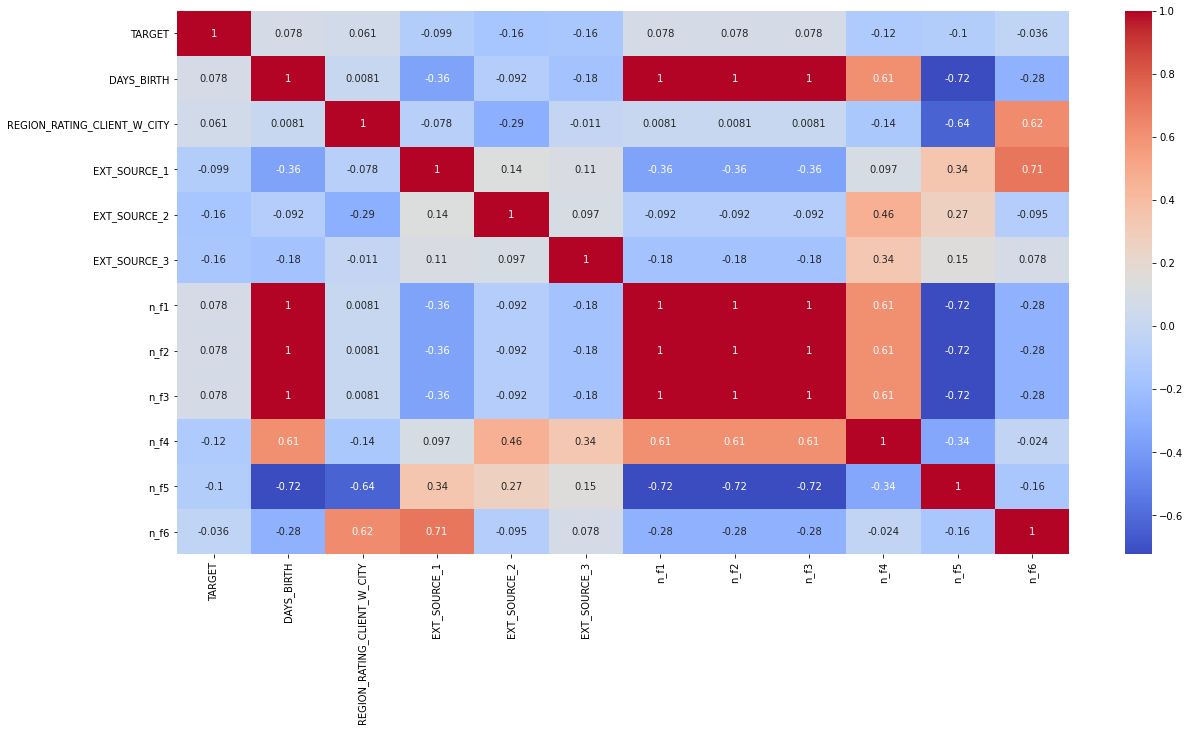

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,10))
sns.heatmap(corr, cmap = 'coolwarm', annot = True)
plt.show()

In [40]:
# seleksi features
f_select = corr[abs(corr['TARGET'])>0.065].index
f_select = pd.DataFrame(f_select)
f_select

,0
0,TARGET
1,DAYS_BIRTH
2,EXT_SOURCE_1
3,EXT_SOURCE_2
4,EXT_SOURCE_3
5,n_f1
6,n_f2
7,n_f3
8,n_f4
9,n_f5


In [41]:
# Gunakan features

data1 = data[['TARGET','DAYS_BIRTH','n_f1',
              'n_f2','n_f3']]
# data.shape
# data = data.corr()
data1.head()

,TARGET,DAYS_BIRTH,n_f1,n_f2,n_f3
0,1,-9461,-9460.916963,-9460.737051,-9460.860624
1,0,-16765,-16764.688733,-16764.377754,-16764.489147
2,0,-19046,-19045.497870,-19045.444088,-19045.270433
3,0,-19005,-19004.497870,-19004.349558,-19004.489147
4,0,-19932,-19931.497870,-19931.677262,-19931.489147


In [42]:
data1['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [43]:
data1.shape

(307511, 5)

# Sklearn

In [44]:
# import library model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
import time

# Features & Target

In [45]:
# target = data1['TARGET']
x = data1.drop(['TARGET'], axis = 1)
y = data1['TARGET']
x.shape, y.shape, y.value_counts()

((307511, 4),
 (307511,),
 0    282686
 1     24825
 Name: TARGET, dtype: int64)

# Split & Smote

In [46]:
from imblearn.over_sampling import SMOTE

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train,y_train)
y_train.value_counts()

0    226132
1    226132
Name: TARGET, dtype: int64

# Algoritma

In [47]:
# Naive Bayes
start_time = time.time()
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc

nb = GaussianNB()
nb.fit(x_train, y_train)
prediction_nb = nb.predict(x_test)


nb_fpr, nb_tpr, treshold = roc_curve(y_test, prediction_nb)
auc_prediction_nb = auc(nb_fpr, nb_tpr)

print('Naive bayes')
print(classification_report(y_test, prediction_nb))
print('Roc_Auc = ',auc_prediction_nb)
print("--- %s Detik ---" % (time.time() - start_time))

Naive bayes
              precision    recall  f1-score   support

           0       0.94      0.48      0.64     56554
           1       0.10      0.64      0.17      4949

    accuracy                           0.50     61503
   macro avg       0.52      0.56      0.40     61503
weighted avg       0.87      0.50      0.60     61503

Roc_Auc =  0.563442444832471
--- 0.26953887939453125 Detik ---


In [48]:
# Decision Tree
start_time = time.time()

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
prediction_dt = tree.predict(x_test)

dt_fpr, dt_tpr, treshold = roc_curve(y_test, prediction_dt)
auc_prediction_dt = auc(dt_fpr, dt_tpr)


print('Decision Tree')
print(classification_report(y_test, prediction_dt))
print('Roc_Auc = ',auc_prediction_dt)
print("--- %s Detik ---" % (time.time() - start_time))
# metrics.plot_roc_curve(tree, x_test, y_test)

Decision Tree
              precision    recall  f1-score   support

           0       0.93      0.85      0.89     56554
           1       0.12      0.23      0.16      4949

    accuracy                           0.80     61503
   macro avg       0.52      0.54      0.52     61503
weighted avg       0.86      0.80      0.83     61503

Roc_Auc =  0.5416155580141621
--- 18.957685470581055 Detik ---


In [49]:
# K-Nearest Negihbors
start_time = time.time()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train, y_train)
prediction_knn = knn.predict(x_test)

knn_fpr, knn_tpr, treshold = roc_curve(y_test, prediction_knn)
auc_prediction_knn = auc(knn_fpr, knn_tpr)

print('K-Nearest Neighbors')
print(classification_report(y_test, prediction_knn))
print('Roc_Auc = ',auc_prediction_knn)
print("--- %s Detik ---" % (time.time() - start_time))

K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.93      0.85      0.89     56554
           1       0.13      0.26      0.17      4949

    accuracy                           0.80     61503
   macro avg       0.53      0.55      0.53     61503
weighted avg       0.87      0.80      0.83     61503

Roc_Auc =  0.5548757188227799
--- 8.839830160140991 Detik ---


# Ensemble

In [50]:
start_time = time.time()
from sklearn.ensemble import VotingClassifier

dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
# nb = GaussianNB()

b = ('dtc',dtc)
e = ('knn',knn)
# f = ('nb',nb)

z = [b,e]
list_model = z

vote = VotingClassifier(list_model)
vote.fit(x_train,y_train)

def evaluasi_model(model,x_test,y_test):
    from sklearn.metrics import accuracy_score
    y_pred = model.predict(x_test)
    return accuracy_score(y_test,y_pred)

print('Ensemble : ')
print(evaluasi_model(vote,x_test,y_test)*100,'%')

print("--- %s Detik ---" % (time.time() - start_time))

Ensemble : 
86.1827878314879 %
--- 26.318200826644897 Detik ---


# Application_test

In [51]:
dtest = pd.read_csv("application_test.csv")
dtest.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df_1 = dtest.select_dtypes(include=['int64'])
df_2 = dtest.select_dtypes(include=['O'])
df_3 = dtest.select_dtypes(include=['float64'])

In [53]:
jml_1 = df_1.isnull().sum()/df_1.shape[0]*100
jml_2 = df_2.isnull().sum()/df_2.shape[0]*100
jml_3 = df_3.isnull().sum()/df_3.shape[0]*100
print(jml_3)

AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.049237
AMT_GOODS_PRICE                0.000000
REGION_POPULATION_RELATIVE     0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     12.409732
AMT_REQ_CREDIT_BUREAU_WEEK    12.409732
AMT_REQ_CREDIT_BUREAU_MON     12.409732
AMT_REQ_CREDIT_BUREAU_QRT     12.409732
AMT_REQ_CREDIT_BUREAU_YEAR    12.409732
Length: 65, dtype: float64


In [54]:
jml_ = 60
df_2 = df_2.loc[:, (df_2.isnull().sum()/df_2.shape[0]*100 < jml_)]
jml_3 = df_3.isnull().sum()/df_3.shape[0]*100
df_3 = df_3.loc[:, (df_3.isnull().sum()/df_3.shape[0]*100 < jml_)]

In [55]:
for column in df_2:
    df_2[column].fillna(df_2[column].mode()[0], inplace=True)
for i in df_3:
    df_3[i].fillna(df_3[i].mean(), inplace=True)

In [56]:
df_all_ = pd.concat([df_1,df_2,df_3], axis=1)
data_ = df_all[['DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY','EXT_SOURCE_1',
               'EXT_SOURCE_2','EXT_SOURCE_3']]
data_.head()

,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,-9461,2,0.083037,0.262949,0.139376
1,-16765,1,0.311267,0.622246,0.510853
2,-19046,2,0.502130,0.555912,0.729567
3,-19005,2,0.502130,0.650442,0.510853
4,-19932,2,0.502130,0.322738,0.510853


In [57]:
data_ = df_all[['DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY','EXT_SOURCE_1',
               'EXT_SOURCE_2','EXT_SOURCE_3']]
data_['n_f1'] = data_['DAYS_BIRTH'] + data_['EXT_SOURCE_1']
data_['n_f2'] = data_['DAYS_BIRTH'] + data_['EXT_SOURCE_2']
data_['n_f3'] = data_['DAYS_BIRTH'] + data_['EXT_SOURCE_3']
data_['n_f4'] = data_['DAYS_BIRTH'] / (data_['EXT_SOURCE_1'] + data_['EXT_SOURCE_2'] + data_['EXT_SOURCE_3'])
data_['n_f5'] = data_['REGION_RATING_CLIENT_W_CITY'] / data_['DAYS_BIRTH']
data_['n_f6'] = data_['REGION_RATING_CLIENT_W_CITY'] * data_['EXT_SOURCE_1']

data1_ = data_[['DAYS_BIRTH','n_f1',
              'n_f2','n_f3']]

C:\Users\salri\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\salri\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salri\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [59]:
x_test_ = data1_
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
prediction_knn_ = knn.predict(x_test_)
result = prediction_knn_
result

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
dtest = pd.read_csv("application_test.csv")

df_1 = dtest.select_dtypes(include=['int64'])
df_2 = dtest.select_dtypes(include=['O'])
df_3 = dtest.select_dtypes(include=['float64'])

jml_1 = df_1.isnull().sum()/df_1.shape[0]*100
jml_2 = df_2.isnull().sum()/df_2.shape[0]*100
jml_3 = df_3.isnull().sum()/df_3.shape[0]*100

jml_ = 60
df_2 = df_2.loc[:, (df_2.isnull().sum()/df_2.shape[0]*100 < jml_)]
jml_3 = df_3.isnull().sum()/df_3.shape[0]*100
df_3 = df_3.loc[:, (df_3.isnull().sum()/df_3.shape[0]*100 < jml_)]

for column in df_2:
    df_2[column].fillna(df_2[column].mode()[0], inplace=True)
for i in df_3:
    df_3[i].fillna(df_3[i].mean(), inplace=True)

df_all_ = pd.concat([df_1,df_2,df_3], axis=1)
data_ = df_all[['DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY','EXT_SOURCE_1',
               'EXT_SOURCE_2','EXT_SOURCE_3']]

data_ = df_all[['DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY','EXT_SOURCE_1',
               'EXT_SOURCE_2','EXT_SOURCE_3']]
data_['n_f1'] = data_['DAYS_BIRTH'] + data_['EXT_SOURCE_1']
data_['n_f2'] = data_['DAYS_BIRTH'] + data_['EXT_SOURCE_2']
data_['n_f3'] = data_['DAYS_BIRTH'] + data_['EXT_SOURCE_3']
data_['n_f4'] = data_['DAYS_BIRTH'] / (data_['EXT_SOURCE_1'] + data_['EXT_SOURCE_2'] + data_['EXT_SOURCE_3'])
data_['n_f5'] = data_['REGION_RATING_CLIENT_W_CITY'] / data_['DAYS_BIRTH']
data_['n_f6'] = data_['REGION_RATING_CLIENT_W_CITY'] * data_['EXT_SOURCE_1']

data1_ = data_[['DAYS_BIRTH','n_f1',
              'n_f2','n_f3']]

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

x_test_ = data1_
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
prediction_knn_ = knn.predict(x_test_)
result = prediction_knn_
result

C:\Users\salri\anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\salri\anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\salri\anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

# Target

In [61]:
result = pd.DataFrame(result)
result.columns = ['TARGET']
result.head()

,TARGET
0,0
1,1
2,0
3,0
4,0


# Data testing & target

In [62]:
result_test = pd.concat([result,dtest], axis=1)
result_test.head()

,TARGET,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,100001.0,Cash loans,F,N,Y,0.0,135000.0,568800.0,20560.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,100005.0,Cash loans,M,N,Y,0.0,99000.0,222768.0,17370.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,0,100013.0,Cash loans,M,Y,Y,0.0,202500.0,663264.0,69777.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
3,0,100028.0,Cash loans,F,N,Y,2.0,315000.0,1575000.0,49018.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,0,100038.0,Cash loans,M,Y,N,1.0,180000.0,625500.0,32067.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


# Periksa Data Training

In [63]:
dtrain.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Periksa data testing

In [64]:
dtest.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# <center>Terima Kasih</center>

# <center>Rifyal&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Sasmita&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Seno</center>

<table><tr><td><img src='rifyal.jpg'></td><td><img src='sasmita.jpg'></td><td><img src='seno.jpg'></td></tr></table>

# <center>--- Factorial ---<br></center>